in this project we want to divide customers into different clusters. we will use two algorithms: DBSCAN and KMeans

# plotting libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# reading dataset and obtaining some information

In [169]:
data_set=pd.read_csv("1632560262896716.csv")
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [170]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [171]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# converting categorical variable to numerical

In [172]:
encoder=LabelEncoder()
encoder.fit(["Male","Female"])
data_set["Gender"]=encoder.transform(data_set["Gender"])

In [173]:
mycopy=data_set.drop("CustomerID",axis=1).copy()

In [174]:
mycopy.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# feature scaling

In [175]:
ST=StandardScaler()
X=mycopy.values[:,1:]
cluster_ST=ST.fit_transform(X)

before runnig kmeans algorithm we need to figure out how many clusters do we need?. we need to find the optimal number of clusters so we use elbow method.

In [176]:
p=[]
k=range(1,10)
for n in k:
    kmeans=KMeans(n_clusters=n,init='k-means++', random_state=10)
    kmeans.fit(X)
    p.append(kmeans.inertia_)

# plotting elbow method

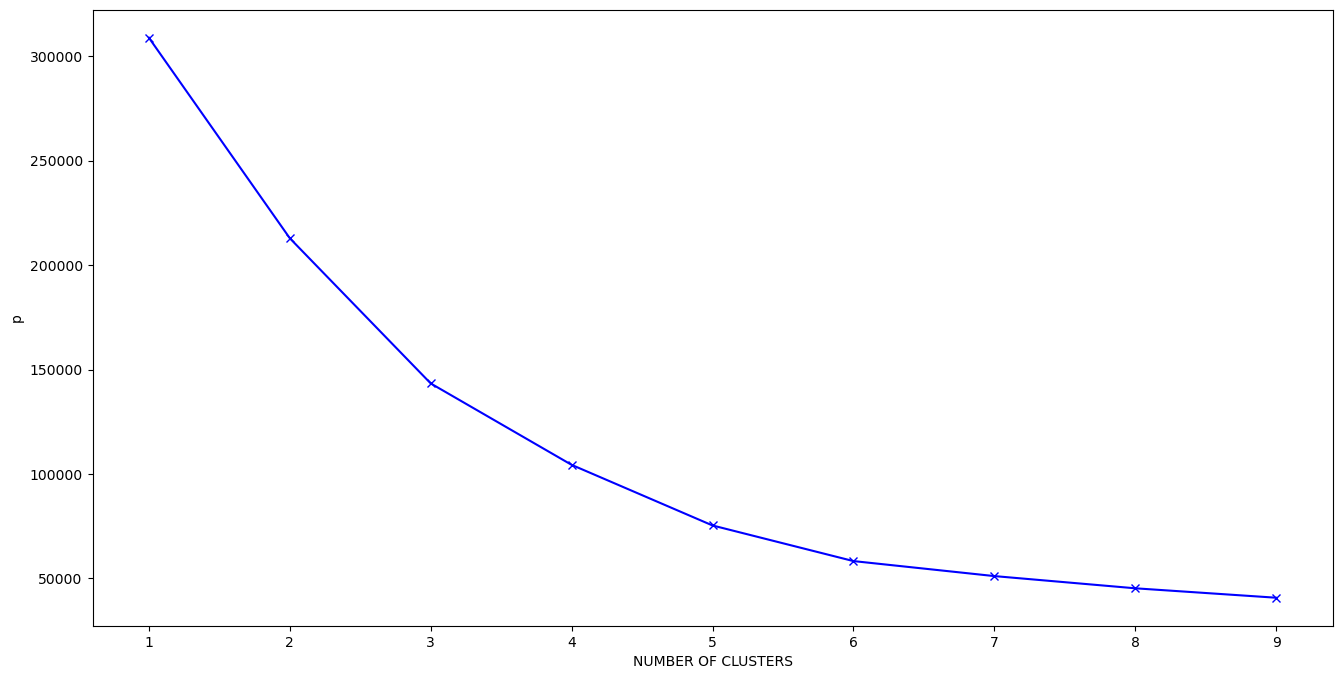

In [177]:
plt.figure(figsize=(16,8))
plt.plot(k,p,'bx-')
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("p")
plt.show()

as it is seen 5 clusters would be optimal number of clusters.

# KMEANS

In [185]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [187]:
mycopy["labels"]=labels
mycopy.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


In [188]:
mycopy.groupby("labels").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
labels,,,,
0,0.527778,40.666667,87.750000,17.583333
1,0.461538,32.692308,86.538462,82.128205
2,0.417722,43.088608,55.291139,49.569620
3,0.391304,45.217391,26.304348,20.913043
4,0.391304,25.521739,26.304348,78.565217


# plotting scatter for features  and showing the clusters and thier centroids

in the diagrams the numbers 0 and 1 and 2 and 3 and 4 are showing this:
0 -> cluster0 and 1-> cluseter1 and 2-> cluster2 and 3-> cluster3 and 4->cluster4

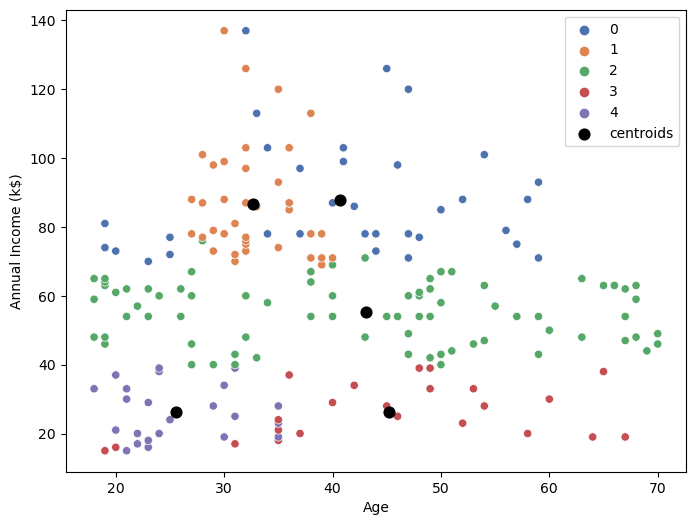

In [192]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=mycopy,x="Age",y="Annual Income (k$)",hue=kmeans.labels_,palette="deep")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black",s=60,label="centroids")
plt.legend()
plt.show()

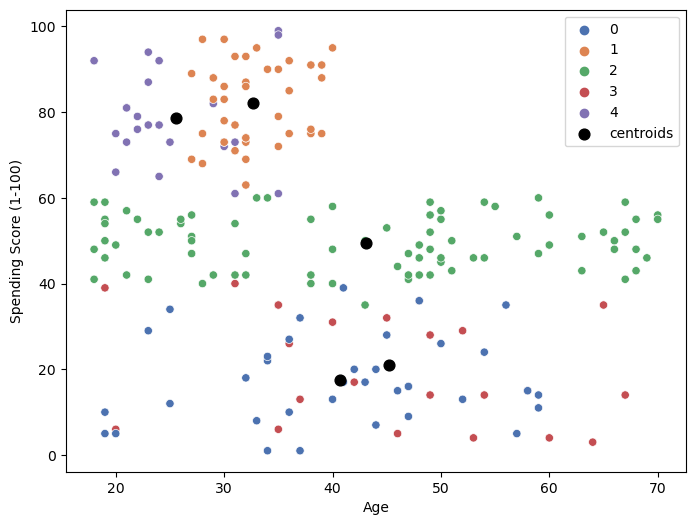

In [196]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=mycopy,x="Age",y="Spending Score (1-100)",hue=kmeans.labels_,palette="deep")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],c="black",s=60,label="centroids")
plt.legend()
plt.show()

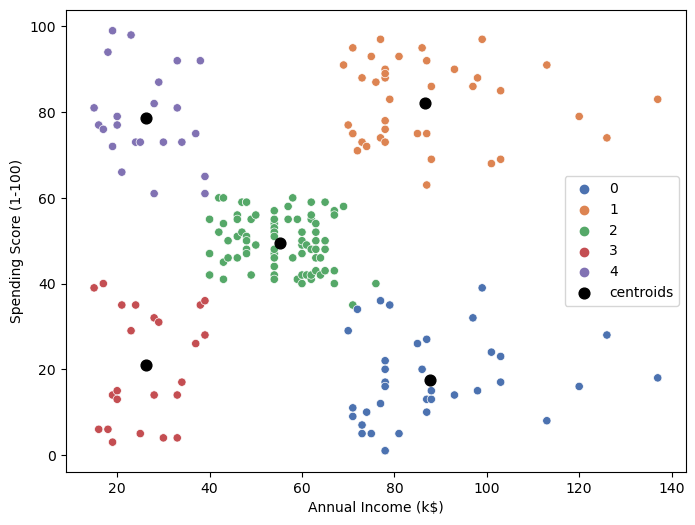

In [198]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=mycopy,x="Annual Income (k$)",y="Spending Score (1-100)",hue=kmeans.labels_,palette="deep")
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c="black",s=60,label="centroids")
plt.legend()
plt.show()

# DBSCAN
in this algorithm we can also see noises

In [256]:
dbscan=DBSCAN(eps=12.45,min_samples=4)
dbscan.fit(X)
labels1=dbscan.labels_

in the diagrams the numbers 0 and 1 and 2 and 3 and 4 are showing this : -1->noises and 0 -> cluster0 and 1-> cluseter1 and 2-> cluster2 and 3-> cluster3 and 4->cluster4

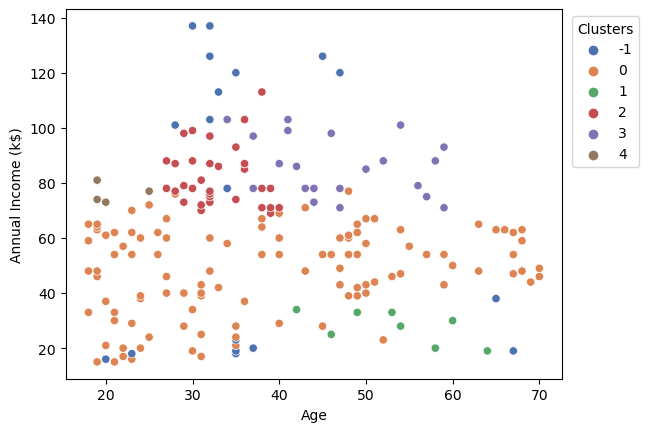

In [258]:
p = sb.scatterplot(data =mycopy, x ="Age" , y = "Annual Income (k$)", hue = dbscan.labels_, legend = "full", palette = "deep")
sb.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

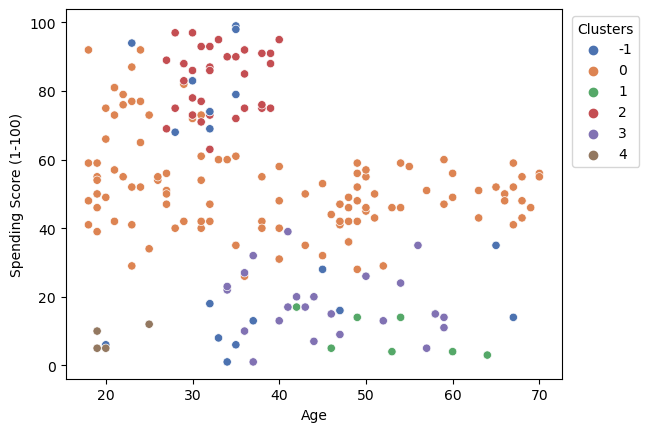

In [259]:
p = sb.scatterplot(data =mycopy, x ="Age" , y ="Spending Score (1-100)" , hue = dbscan.labels_, legend = "full", palette = "deep")
sb.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

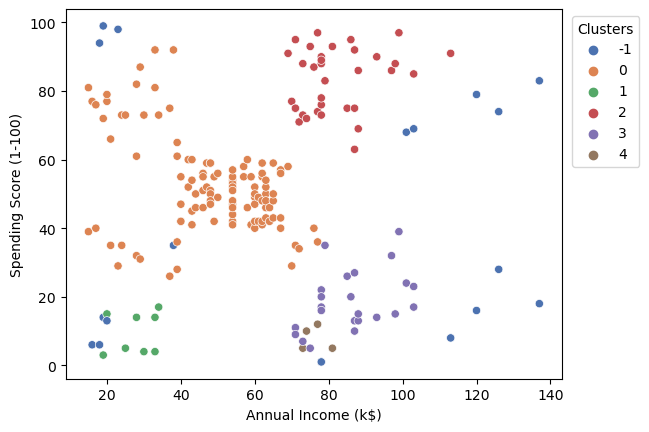

In [260]:
p = sb.scatterplot(data =mycopy, x ="Annual Income (k$)" , y ="Spending Score (1-100)" , hue = dbscan.labels_, legend = "full", palette = "deep")
sb.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()